### Analyze_stable_points - evaluate biase in DEMs using selected unchanged points

These points were picked on hopefully stable points in mostly flat places: docks, lawns, bare spots in middens. Also, the yurt roofs. Typically, 3 to 5 points were picked on most features. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def pcoord(x, y):
    """
    Convert x, y to polar coordinates r, az (geographic convention)
    r,az = pcoord(x, y)
    """
    r  = np.sqrt( x**2 + y**2 )
    az=np.degrees( np.arctan2(x, y) )
    # az[where(az<0.)[0]] += 360.
    az = (az+360.)%360.
    return r, az

def xycoord(r, az):
    """
    Convert r, az [degrees, geographic convention] to rectangular coordinates
    x,y = xycoord(r, az)
    """
    x = r * np.sin(np.radians(az))
    y = r * np.cos(np.radians(az))
    return x, y

In [7]:
df=pd.read_csv("C:\\crs\\proj\\2019_DorianOBX\\Santa_Cruz_Products\\stable_points\\All_points_dunex_lidar.csv",header = 0)
df

,X,Y,Aug,Sep,Oct,Nov,Gnd_50,First_95
0,387521.064,3864904.303,2.111,2.134,2.099,2.138,1.906,1.934
1,387524.918,3864904.854,2.219,2.221,2.187,2.268,1.993,2.000
2,387525.102,3864929.447,1.804,1.854,1.791,1.894,1.597,1.606
3,387524.001,3864924.308,1.802,1.859,1.830,1.880,1.596,1.616
4,387543.822,3864912.012,1.864,1.911,1.869,1.955,1.671,1.702
5,387604.204,3864943.579,1.879,1.871,1.904,1.947,1.691,1.709
6,387602.185,3864951.471,1.755,1.730,1.749,1.806,1.537,1.584
7,387604.204,3864943.579,1.879,1.871,1.904,1.947,1.691,1.709
8,390597.287,3868350.494,0.434,0.495,0.550,0.475,0.225,0.251
9,390597.287,3868350.494,0.434,0.495,0.550,0.475,0.225,0.251


In [8]:
col = df.loc[: , "Aug":"Nov"]
df['mean']=col.mean(axis=1)
df['std']=col.std(axis=1)
df['gnd50 anom']=df['Gnd_50']-df['mean']
df['first95 anom']=df['First_95']-df['mean']
df['Aug anom']=df['Aug']-df['mean']
df['Sep anom']=df['Sep']-df['mean']
df['Oct anom']=df['Oct']-df['mean']
df['Nov anom']=df['Nov']-df['mean']
r,az = pcoord( df['X'].values, df['Y'].values)
xr, yr = xycoord( r, az+42.)
df['alongshore']=xr-2870000.
df

,X,Y,Aug,Sep,Oct,Nov,Gnd_50,First_95,mean,std,gnd50 anom,first95 anom,Aug anom,Sep anom,Oct anom,Nov anom,alongshore
0,387521.064,3864904.303,2.111,2.134,2.099,2.138,1.906,1.934,2.12050,0.018628,-0.21450,-0.18650,-0.00950,0.01350,-0.02150,0.01750,4110.033260
1,387524.918,3864904.854,2.219,2.221,2.187,2.268,1.993,2.000,2.22375,0.033360,-0.23075,-0.22375,-0.00475,-0.00275,-0.03675,0.04425,4113.266032
2,387525.102,3864929.447,1.804,1.854,1.791,1.894,1.597,1.606,1.83575,0.047388,-0.23875,-0.22975,-0.03175,0.01825,-0.04475,0.05825,4129.858699
3,387524.001,3864924.308,1.802,1.859,1.830,1.880,1.596,1.616,1.84275,0.034033,-0.24675,-0.22675,-0.04075,0.01625,-0.01275,0.03725,4125.601835
4,387543.822,3864912.012,1.864,1.911,1.869,1.955,1.671,1.702,1.89975,0.042437,-0.22875,-0.19775,-0.03575,0.01125,-0.03075,0.05525,4132.104078
5,387604.204,3864943.579,1.879,1.871,1.904,1.947,1.691,1.709,1.90025,0.034189,-0.20925,-0.19125,-0.02125,-0.02925,0.00375,0.04675,4198.099095
6,387602.185,3864951.471,1.755,1.730,1.749,1.806,1.537,1.584,1.76000,0.032465,-0.22300,-0.17600,-0.00500,-0.03000,-0.01100,0.04600,4201.879464
7,387604.204,3864943.579,1.879,1.871,1.904,1.947,1.691,1.709,1.90025,0.034189,-0.20925,-0.19125,-0.02125,-0.02925,0.00375,0.04675,4198.099095
8,390597.287,3868350.494,0.434,0.495,0.550,0.475,0.225,0.251,0.48850,0.048225,-0.26350,-0.23750,-0.05450,0.00650,0.06150,-0.01350,8702.064338
9,390597.287,3868350.494,0.434,0.495,0.550,0.475,0.225,0.251,0.48850,0.048225,-0.26350,-0.23750,-0.05450,0.00650,0.06150,-0.01350,8702.064338


In [9]:
df_anom = df.loc[:,"gnd50 anom":"Nov anom"].copy()
df_anom

,gnd50 anom,first95 anom,Aug anom,Sep anom,Oct anom,Nov anom
0,-0.21450,-0.18650,-0.00950,0.01350,-0.02150,0.01750
1,-0.23075,-0.22375,-0.00475,-0.00275,-0.03675,0.04425
2,-0.23875,-0.22975,-0.03175,0.01825,-0.04475,0.05825
3,-0.24675,-0.22675,-0.04075,0.01625,-0.01275,0.03725
4,-0.22875,-0.19775,-0.03575,0.01125,-0.03075,0.05525
5,-0.20925,-0.19125,-0.02125,-0.02925,0.00375,0.04675
6,-0.22300,-0.17600,-0.00500,-0.03000,-0.01100,0.04600
7,-0.20925,-0.19125,-0.02125,-0.02925,0.00375,0.04675
8,-0.26350,-0.23750,-0.05450,0.00650,0.06150,-0.01350
9,-0.26350,-0.23750,-0.05450,0.00650,0.06150,-0.01350


In [10]:
print(df_anom.mean())
print(df_anom.std())

gnd50 anom     -0.266729
first95 anom   -0.229474
Aug anom        0.003241
Sep anom        0.057920
Oct anom       -0.023571
Nov anom       -0.037590
dtype: float64
gnd50 anom      0.062508
first95 anom    0.058461
Aug anom        0.051080
Sep anom        0.064225
Oct anom        0.049115
Nov anom        0.068527
dtype: float64


Text(0.5, 0, 'Alongshore Distance (m)')

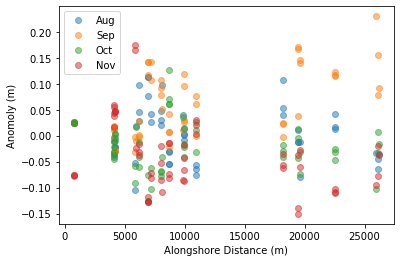

In [11]:
plt.plot(df['alongshore'],df['Aug anom'],'o',alpha=.5,label='Aug')
plt.plot(df['alongshore'],df['Sep anom'],'o',alpha=.5,label='Sep')
plt.plot(df['alongshore'],df['Oct anom'],'o',alpha=.5,label='Oct')
plt.plot(df['alongshore'],df['Nov anom'],'o',alpha=.5,label='Nov')
plt.legend()
plt.ylabel('Anomoly (m)')
plt.xlabel('Alongshore Distance (m)')

Text(0.5, 0, 'Elevation (m NAVD88)')

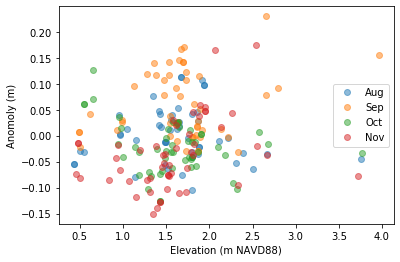

In [12]:
plt.plot(df['Aug'],df['Aug anom'],'o',alpha=.5,label='Aug')
plt.plot(df['Sep'],df['Sep anom'],'o',alpha=.5,label='Sep')
plt.plot(df['Oct'],df['Oct anom'],'o',alpha=.5,label='Oct')
plt.plot(df['Nov'],df['Nov anom'],'o',alpha=.5,label='Nov')
plt.legend()
plt.ylabel('Anomoly (m)')
plt.xlabel('Elevation (m NAVD88)')

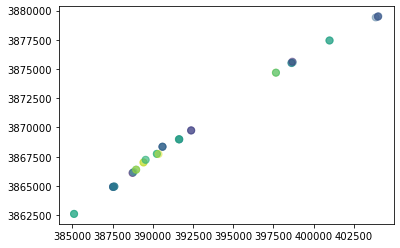

In [13]:
plt.scatter(df['X'].values,df['Y'].values,s=50,c=df['Aug anom'].values,alpha=.4)

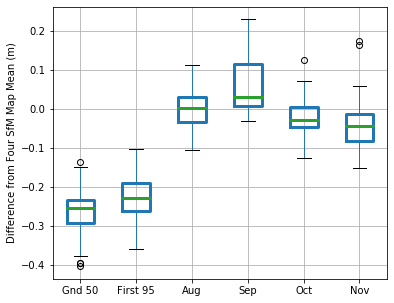

In [17]:
# boxplot of anomolies
boxprops = dict(linestyle='-', linewidth=3, color='k')
medianprops = dict(linestyle='-', linewidth=3, color='k')
bp=df_anom.boxplot(figsize=(6,5),grid=True,boxprops=boxprops, medianprops=medianprops)
plt.ylabel('Difference from Four SfM Map Mean (m)')
bp.set_xticklabels(['Gnd 50','First 95','Aug','Sep','Oct','Nov'])
plt.savefig('unchanged_pts_boxplot.png',dpi=200)